# Loading Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

train = pd.read_csv("../Data/train.csv")

print(train.columns.tolist())
print(train.shape)
display(train.head())
print(train.info())

['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes', 'Genre', 'Host_Popularity_percentage', 'Publication_Day', 'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment', 'Listening_Time_minutes']
(750000, 12)


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [3]:
test = pd.read_csv("../Data/test.csv", nrows=5)
print(test.columns.tolist())
print(test.shape)
display(test.head(5))
print(test.info())

['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes', 'Genre', 'Host_Popularity_percentage', 'Publication_Day', 'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment']
(5, 11)


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           5 non-null      int64  
 1   Podcast_Name                 5 non-null      object 
 2   Episode_Title                5 non-null      object 
 3   Episode_Length_minutes       5 non-null      float64
 4   Genre                        5 non-null      object 
 5   Host_Popularity_percentage   5 non-null      float64
 6   Publication_Day              5 non-null      object 
 7   Publication_Time             5 non-null      object 
 8   Guest_Popularity_percentage  4 non-null      float64
 9   Number_of_Ads                5 non-null      float64
 10  Episode_Sentiment            5 non-null      object 
dtypes: float64(4), int64(1), object(6)
memory usage: 572.0+ bytes
None


# Cleaning Data
## Things to do:
- Compare columns and remove the label column before finding missing columns
- Find duplicates and remove them
- Find missing columns and fill them up
- Align train and test data have the same columns
- Save the cleaned data

In [5]:
# compare columns
train_cols = set(train.columns)
test_cols = set(test.columns)

print("Columns only in train:", train_cols - test_cols)

label_col = 'Listening_Time_minutes'

Columns only in train: {'Listening_Time_minutes'}


In [6]:
# Check duplicates & remove them
train = train.drop_duplicates()

# remove the label col
feature_cols = [col for col in train.columns if col != label_col]

# Find missing columns
for col in feature_cols:
    # if it's numeric
    if train[col].dtype != "object":
        median = train[col].median()
        # fill in NAN only
        train[col] = train[col].fillna(median)
        test[col] = test[col].fillna(median)
    else:
        # get the most frequent value
        mode = train[col].mode()[0]
        # fill in NAN only
        train[col] = train[col].fillna(mode)
        test[col] = test[col].fillna(mode)
        

# Align train/test data
train, test = train.align(test, join="left", axis=1, fill_value=0)

# Save the cleaned data
train.to_csv("../Data/clean_train.csv", index=False)
test.to_csv("../Data/clean_test.csv", index=False)

print('Cleaned data saved successfully: \nData/clean_train.csv\nData/clean_test.csv\n')

Cleaned data saved successfully: 
Data/clean_train.csv
Data/clean_test.csv



### Cleaned train data

In [8]:
clean_train = pd.read_csv("../Data/clean_train.csv")
clean_test = pd.read_csv("../Data/clean_test.csv")

print(clean_train.columns.tolist())
display(clean_train.head())

['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes', 'Genre', 'Host_Popularity_percentage', 'Publication_Day', 'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment', 'Listening_Time_minutes']


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,63.84,True Crime,74.81,Thursday,Night,53.58,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


### Cleaned test data

In [10]:
print(clean_test.columns.tolist())
display(clean_test.head())

['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes', 'Genre', 'Host_Popularity_percentage', 'Publication_Day', 'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment', 'Listening_Time_minutes']


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral,0
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,53.58,0.0,Neutral,0
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive,0
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive,0
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral,0


# Data Visualization

### Basic stats for train data

In [12]:
# Basic stats for train data
numeric_df = clean_train.select_dtypes(include=[np.number])
display(numeric_df.describe().T) 

,count,mean,std,min,25%,50%,75%,max
id,750000.0,374999.500000,216506.495284,0.0,187499.75000,374999.50000,562499.25000,749999.00
Episode_Length_minutes,750000.0,64.427546,30.996996,0.0,39.42000,63.84000,90.31000,325.24
Host_Popularity_percentage,750000.0,59.859901,22.873098,1.3,39.41000,60.05000,79.53000,119.46
Guest_Popularity_percentage,750000.0,52.498047,25.537152,0.0,34.55000,53.58000,71.04000,119.91
Number_of_Ads,750000.0,1.348854,1.151130,0.0,0.00000,1.00000,2.00000,103.91
Listening_Time_minutes,750000.0,45.437406,27.138306,0.0,23.17835,43.37946,64.81158,119.97


### Numeric feature distributions (one chart per feature)

Plotting histograms for: ['Episode_Length_minutes', 'Host_Popularity_percentage', 'Guest_Popularity_percentage', 'Number_of_Ads', 'Listening_Time_minutes']


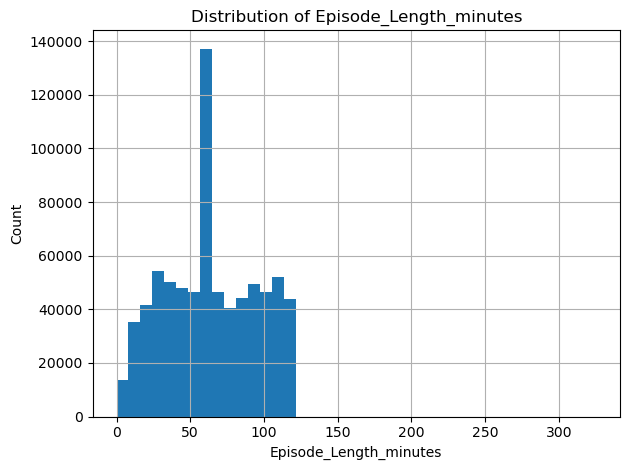

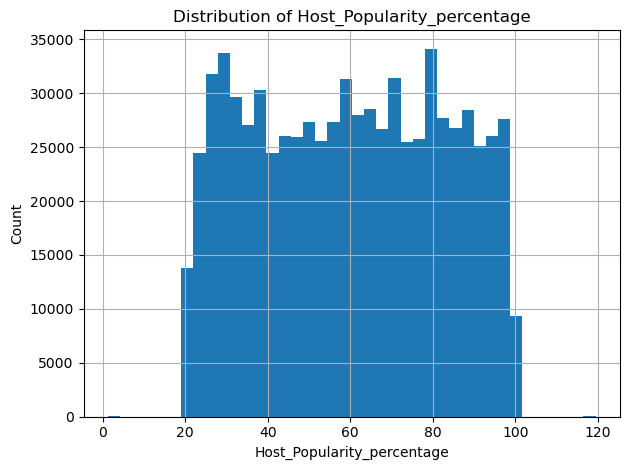

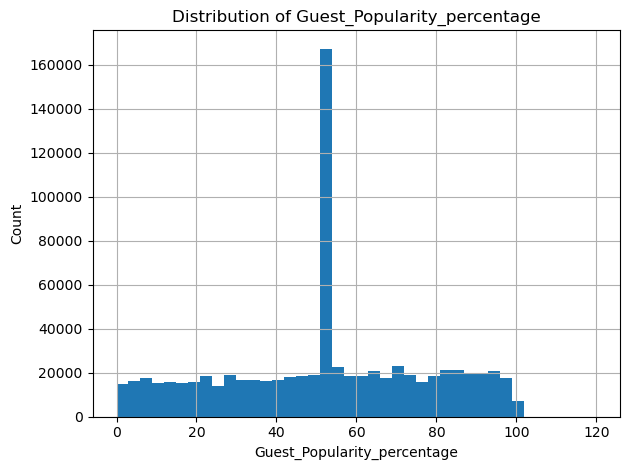

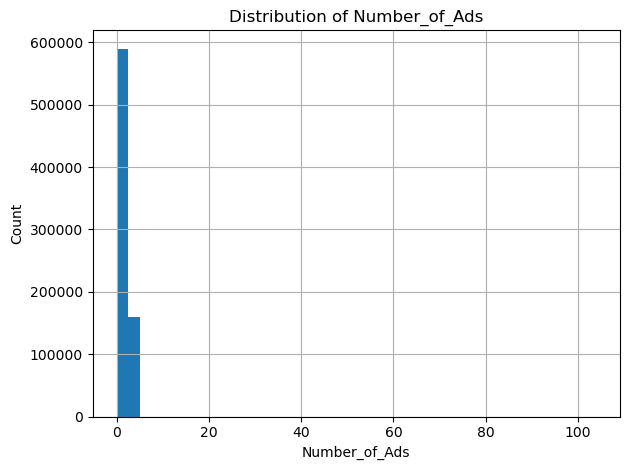

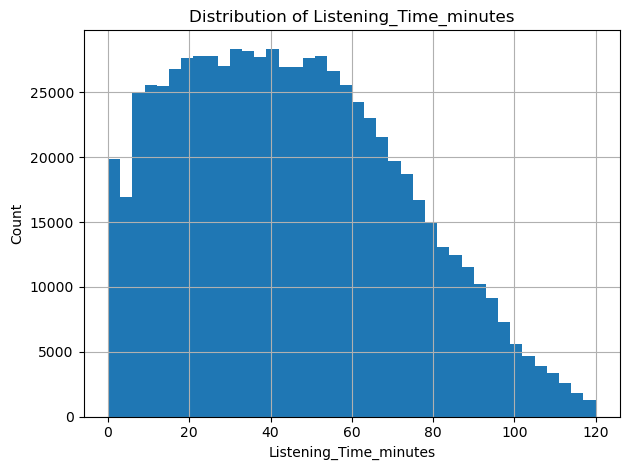

In [14]:
numeric_cols = clean_train.select_dtypes(include=[np.number]).columns.tolist()

# Exclude id column
numeric_cols = [c for c in numeric_cols if c != "id"]

MAX_COLS = len(numeric_cols)
plot_cols = numeric_cols[:MAX_COLS]

print("Plotting histograms for:", plot_cols)

for col in plot_cols:
    plt.figure()
    clean_train[col].dropna().hist(bins=40)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


### Find the correlation between numerical data and the listening time

In [16]:
df_num = clean_train.select_dtypes(include=[np.number]).copy()
correlation = df_num.corr()
correlation = correlation['Listening_Time_minutes'].sort_values(ascending=False)
correlation = correlation.drop('Listening_Time_minutes')
correlation = correlation.drop('id') # No correlation for the id column
print(correlation)


Episode_Length_minutes         0.866221
Host_Popularity_percentage     0.050870
Guest_Popularity_percentage   -0.014446
Number_of_Ads                 -0.118337
Name: Listening_Time_minutes, dtype: float64


### Use correlation matrix to find feature relationships
* Pick a threshold to select features with highh correlation with listening time
* Since there are only 4 features (excluding 'id'), all features will be included

Features with correlation higher than -0.5: 
Episode_Length_minutes         0.866221
Host_Popularity_percentage     0.050870
Guest_Popularity_percentage   -0.014446
Number_of_Ads                 -0.118337
Name: Listening_Time_minutes, dtype: float64




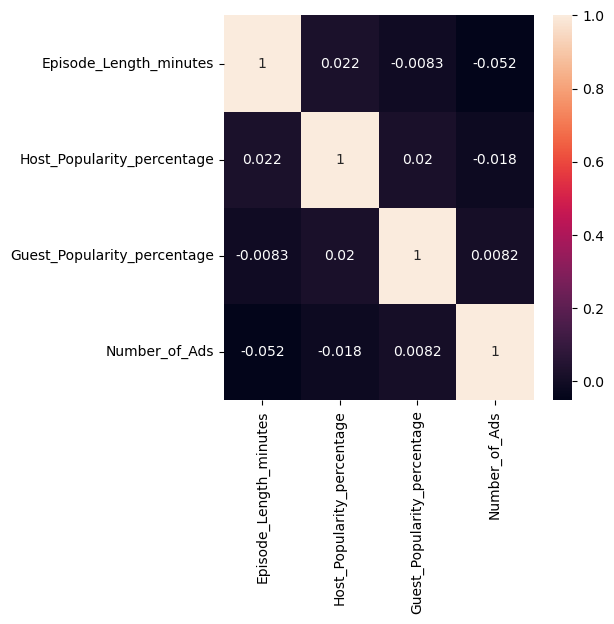

In [18]:
import seaborn as sns

threshold = -0.5 # Can be modified
top_features = correlation[correlation > threshold]
print(f"Features with correlation higher than {threshold}: ")
print(top_features)
print("\n")

# Check for multicollinearity among the top features
corr_matrix_top_features = df_num[top_features.index].corr()
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix_top_features, annot=True)
plt.show()

### Plot pairplot for top features
* Drop one of the highly correlated features with one another with correration > 0.02
* Randomly drop one of the paired features (results may differ when run multiple times)

In [20]:
import random

# In case it returns an empty list when only running this blcok.
top_features = correlation[correlation > threshold]

high_corr_feature_pairs = []
for i in range(len(top_features)):
    for j in range(i+1, len(top_features)):
        # print(abs(corr_matrix_top_features.iloc[i, j]))
        if abs(corr_matrix_top_features.iloc[i, j]) > 0.02:
            high_corr_feature_pairs.append((top_features.index[i], top_features.index[j]))
print("Highly correlated feature pairs: ", high_corr_feature_pairs)
print("\n")

for pair in high_corr_feature_pairs:
    drop_feature = random.choice(pair)
    if drop_feature in top_features:
        top_features = top_features.drop(drop_feature)
        break

print(f"Features with correlation higher than 0.01 after dropping highly correlated features: {top_features}")

Highly correlated feature pairs:  [('Episode_Length_minutes', 'Host_Popularity_percentage'), ('Episode_Length_minutes', 'Number_of_Ads'), ('Host_Popularity_percentage', 'Guest_Popularity_percentage')]


Features with correlation higher than 0.01 after dropping highly correlated features: Host_Popularity_percentage     0.050870
Guest_Popularity_percentage   -0.014446
Number_of_Ads                 -0.118337
Name: Listening_Time_minutes, dtype: float64


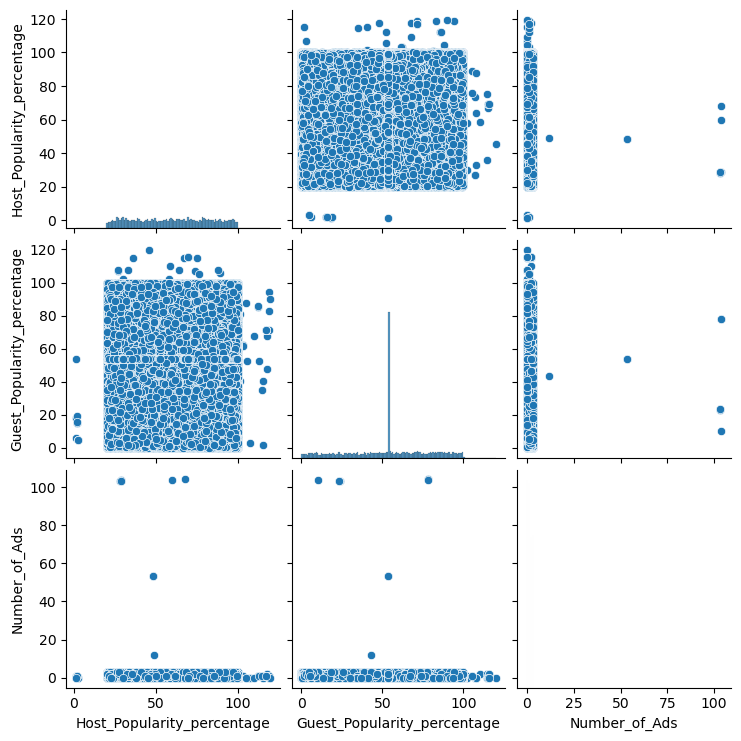

In [21]:
# Now plot pairplot for top features
sns.pairplot(df_num[top_features.index])
plt.show()

### Categorical Distributions (Top Categories)

Plotting categorical counts for: ['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']


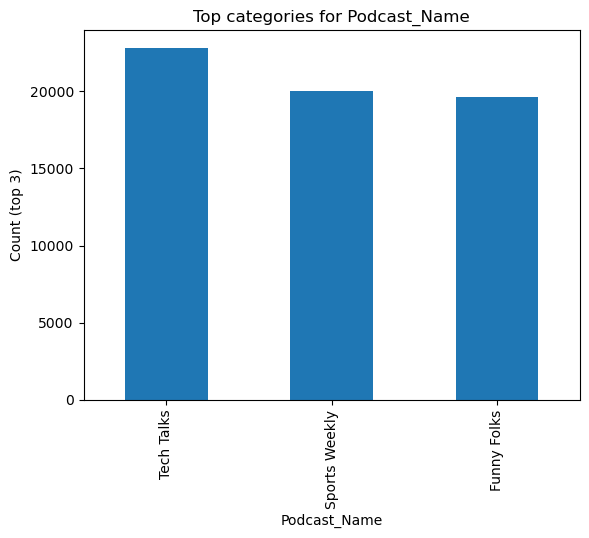

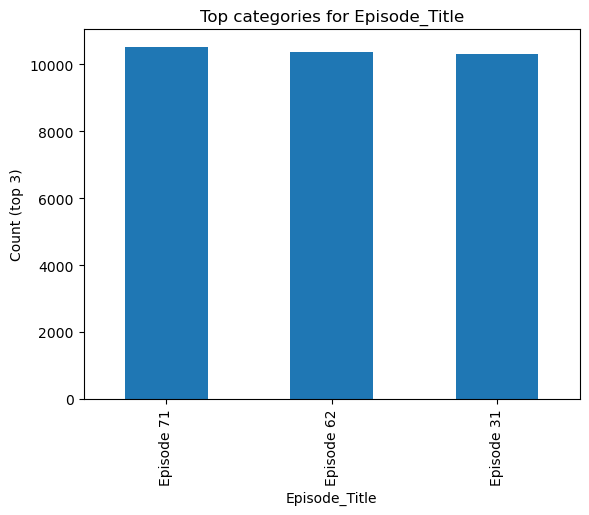

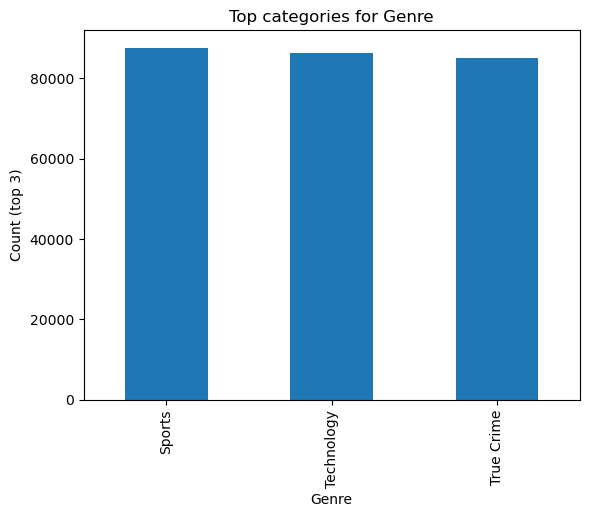

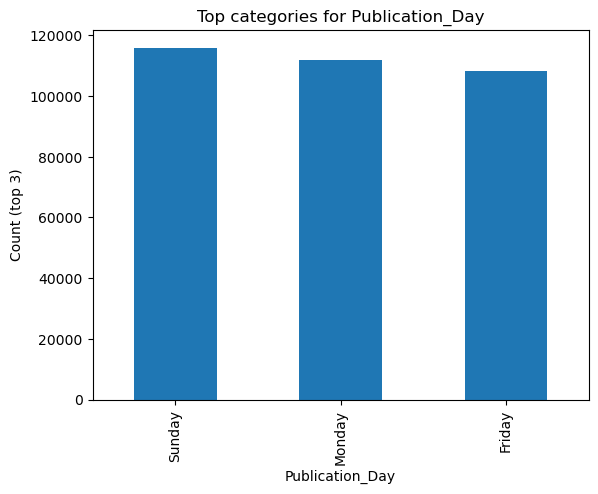

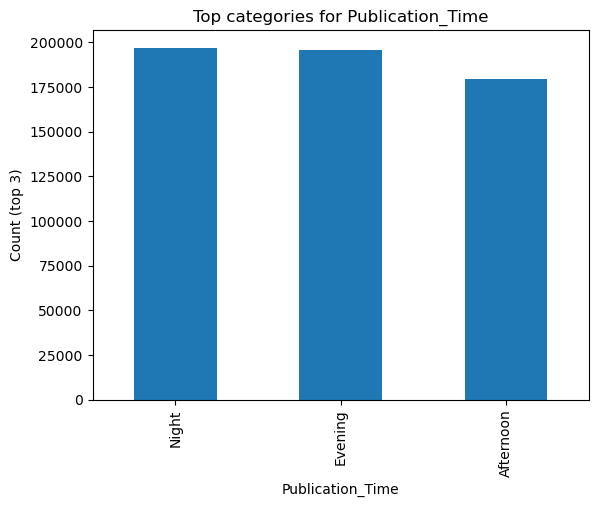

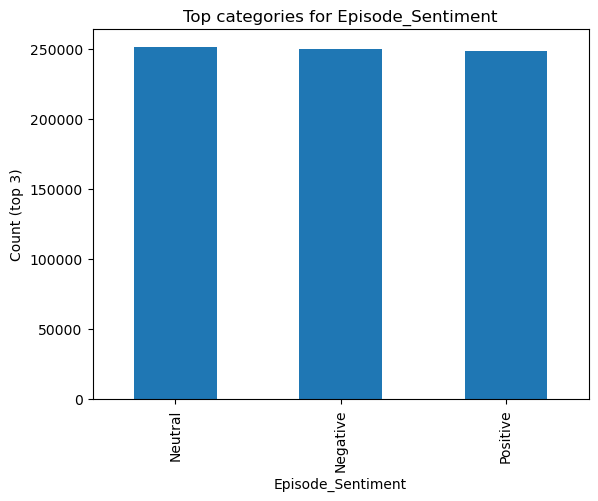

In [37]:
cat_cols = clean_train.select_dtypes(include=["object"]).columns.tolist()

MAX_CATS = 6 # Can be modified
plot_cats = cat_cols[:MAX_CATS]

print("Plotting categorical counts for:", plot_cats)

for col in plot_cats:
    vc = clean_train[col].value_counts().head(3)
    plt.figure()
    vc.plot(kind="bar")
    plt.title(f"Top categories for {col}")
    plt.xlabel(col)
    plt.ylabel("Count (top 3)")
    plt.tight_layout()
    plt.show()